In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [188]:
data = pd.read_csv('data/Train.csv', low_memory=False)
pd.set_option('display.max_columns', None)

for i in data.columns:
    if data[i].isnull().sum() == 0:
        data.drop


SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

In [179]:
data['log_price'] = np.log(data['SalePrice'])
data['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large',
       'Compact'], dtype=object)

In [167]:
#got the year made past 1970
data_1970 = data[data['YearMade'] > 1970]
#grabbed only the log price and the product size
productdf = data_1970[['ProductSize', 'log_price']].dropna()
#used get dummmies to separate product size
dummy = pd.get_dummies(productdf['ProductSize']).drop(columns='Mini')
X = sm.add_constant(dummy)
y = productdf['log_price']

/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/morganabbitt/anaconda3/lib/python3.7/site

(        const  Compact  Large  Large / Medium  Medium  Small
 1         1.0        0      0               0       1      0
 3         1.0        0      0               0       0      1
 6         1.0        0      0               1       0      0
 8         1.0        0      0               0       0      0
 12        1.0        0      0               1       0      0
 ...       ...      ...    ...             ...     ...    ...
 401120    1.0        0      0               0       0      0
 401121    1.0        0      0               0       0      0
 401122    1.0        0      0               0       0      0
 401123    1.0        0      0               0       0      0
 401124    1.0        0      0               0       0      0
 
 [165604 rows x 6 columns], 1         10.950807
 3         10.558414
 6          9.952278
 8          9.975808
 12        10.491274
             ...    
 401120     9.259131
 401121     9.305651
 401122     9.350102
 401123     9.104980
 401124     8.955

In [169]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                 1.569e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:08:55   Log-Likelihood:            -1.3362e+05
No. Observations:              165604   AIC:                         2.673e+05
Df Residuals:                  165598   BIC:                         2.673e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.5827      0.004   2504.561      0.000       9.575       9.590
Compact            0.1135      0.008     13.868      0.000       0.097       0.129
Large              0.9782      0.006    171.911      0.000       0.967       0.989
Large / Medium     1.0875      0.005    236.360      0.000       1.078       1.097
Medium             1.0552      0.004    236.080      0.000       1.046       1.064
Small              0.7238      0.005    138.555      0.000       0.714       0.734
==============================================================================
Omnibus:                     3984.698   Durbin-Watson:                   0.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.803
Skew:                          -0.386   Prob(JB):                         0.00
Kurtosis:                       2.863   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [191]:
# fills different nans inside product size to see which was best to fill.
for i in data['ProductSize'].unique():
    productdf2 = data_1970[['ProductSize', 'log_price']].fillna(i)
    dummy2 = pd.get_dummies(productdf2['ProductSize']).drop(columns='Mini')
    X2 = sm.add_constant(dummy2)
    y2 = productdf2['log_price']
    model2 = sm.OLS(y2, X2)
    results2 = model2.fit()
    print('Fill na values with {}'.format(i))
    print('-------------------------')
    print('R2: {}'.format(results2.rsquared))
    print('\n')

Fill na values with nan
-------------------------
R2: 0.2643542832636072


Fill na values with Medium
-------------------------
R2: 0.14435153903841125


Fill na values with Small
-------------------------
R2: 0.25738105716135184


Fill na values with Large / Medium
-------------------------
R2: 0.15350715238767565


Fill na values with Mini
-------------------------
R2: 0.2643542832636072


Fill na values with Large
-------------------------
R2: 0.23856053440247604


Fill na values with Compact
-------------------------
R2: 0.2746250592556717




In [208]:
X_c

,const,Compact,Large,Large / Medium,Medium,Small
0,1.0,1,0,0,0,0
1,1.0,0,0,0,1,0
2,1.0,1,0,0,0,0
3,1.0,0,0,0,0,1
4,1.0,1,0,0,0,0
...,...,...,...,...,...,...
401120,1.0,0,0,0,0,0
401121,1.0,0,0,0,0,0
401122,1.0,0,0,0,0,0
401123,1.0,0,0,0,0,0


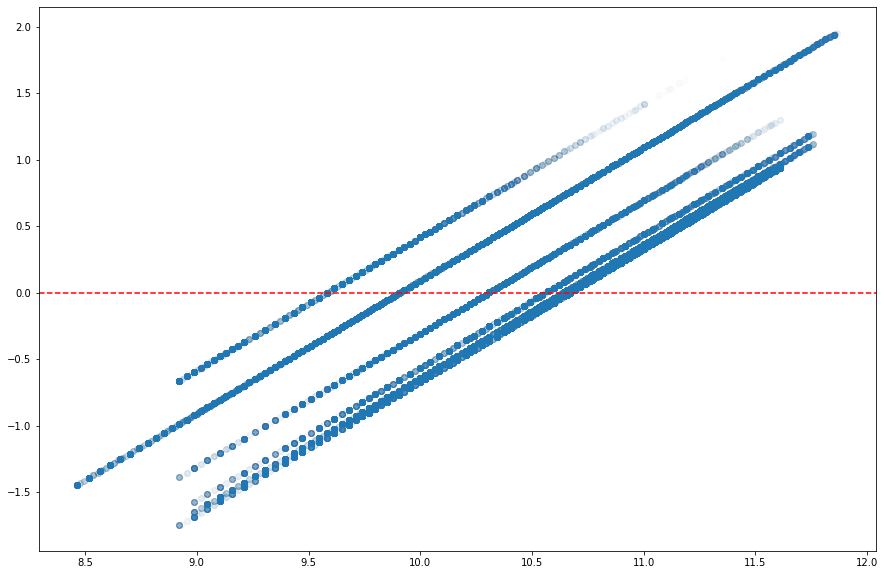

In [207]:
productdf_compact = data_1970[['ProductSize', 'log_price']].fillna('Compact')
dummy_compact = pd.get_dummies(productdf_compact['ProductSize']).drop(columns='Mini')
X_c = sm.add_constant(dummy_compact)
y_c = productdf_compact['log_price']
model_c = sm.OLS(y_c, X_c)
results_c = model_c.fit()
results_c.resid
#print('Fill na values with {}'.format(i))
#print('-------------------------')
#print('R2: {}'.format(results2.rsquared))
#print('\n')
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(productdf_compact['log_price'], results_c.resid, alpha=0.01)
plt.axhline(0, linestyle='--',color='r')
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

In [149]:
#data['log_SalePrice'] = np.log(data['SalePrice'])
prod_df = data[['log_SalePrice', 'ProductSize', 'YearMade']]
#prod_df = prod_df[prod_df['YearMade'] > 1970]
#prod_df.replace(np.nan, 'Medium', inplace=True)
#X, y = sm.add_constant(prod_df).drop(columns=['log_SalePrice', 'YearMade']), prod_df['log_SalePrice']


KeyError: "['log_SalePrice'] not in index"

In [129]:
#X = sm.add_constant(pd.get_dummies(prod_df['ProductSize'])).drop(columns='Small')
#y = prod_df['log_SalePrice']


In [12]:
#benchmark = pd.read_csv('data/median_benchmark.csv')